In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

In [11]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

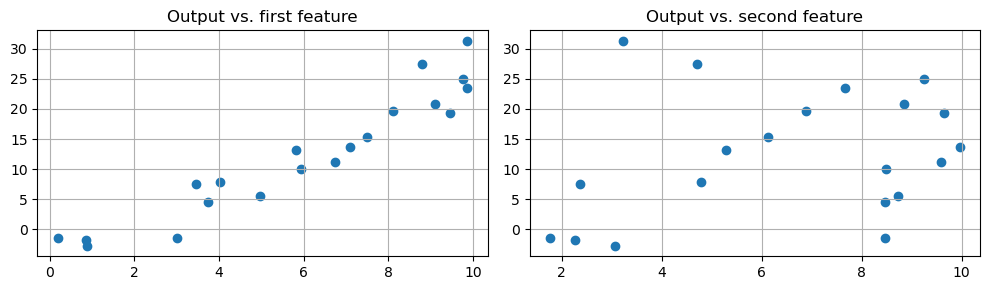

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)
fig.tight_layout()
plt.show()

In [18]:
mlr = MyLinearRegression()
mlr.fit(X,y)

In [14]:
print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.62698936 -1.20586604]


In [15]:
print("The intercept term is given by: ", mlr.intercept_)

The intercept term is given by:  -1.3448355168001243


In [16]:
coef_ = mlr.coef_
y_pred = np.dot(X,coef_)+mlr.intercept_

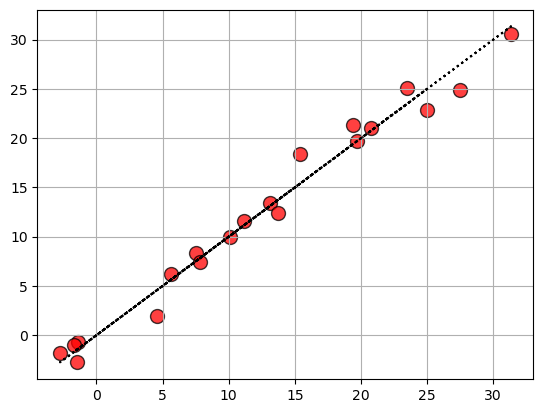

In [17]:
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

# Encapsulation

In [20]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
       
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

In [21]:
mlr = MyLinearRegression()
# Fitting with the data
mlr.fit(X,y)

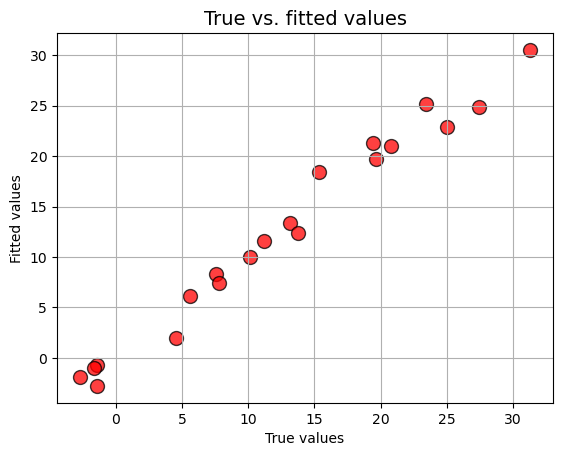

In [22]:
# Call the 'plot_fitted' method
mlr.plot_fitted()